# HOTEL RESERVATION ANALYSIS

## Problem statement

The aim of this analysis is to understand the trends and patterns in hotel reservations to inform strategic decision-making. Specifically, I want to analyze reservation data to identify the factors that impact reservation cancellations and to identify potential opportunities to increase revenue.

The analysis will involve exploring the data to understand the characteristics of the customers who make reservations, such as their booking behavior (advance booking, last minute booking) and preferences. I will also examine the factors that impact reservation cancellations, such as room type, price, length of stay, date of booking and lead time.

Ultimately, I aim to use this analysis to inform strategies to reduce reservation cancellations and increase revenue. This may involve optimizing room rates and inventory, developing targeted marketing campaigns to attract high-value customers, or improving customer service and support to reduce cancellations.

The analysis will be conducted using a dataset of hotel reservation data, which includes information such as booking dates, room types, prices, and cancellation status. I will use data analysis and visualization techniques to identify patterns and trends in the data and to develop insights into the factors that impact reservation cancellations and revenue.


### Business questions:

 1. Most popular times of the year canceled reservations were made
 2. Highest lead time category and Average lead time for cancelations
 3. Most popular room types
 4. Length of stay for canceled bookings
 5. Cancellations by market segment                     
 6. Cancellations by repeated guests as compared to new guests                          
 7. Booking status by number of previous cancellations & number of previous bookings confirmed    
 8. Correlation between average room price and cancelled bookings                      
   
 
 
 
 



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv('Hotel Reservations.csv')

### Exploring the data

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.shape

(36275, 19)

The data has 36,275 rows and 19 columns.

In [6]:
# These are the columns in the data
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
# Summary Statistics
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the data

In [9]:
# Checking for null values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No null values are in the data

## Data cleaning

First I will make a copy of the original data to work on

In [10]:
# Making a copy of the data
df_clean = df.copy()
df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


I noticed that the data has separate columns for the arrival day, arrival month and arrival year so I will merge this into one and create a new column for arrival date. But first of all the arrival day is named 'arrival date' so I will rename this column as 'arrival_day'. 

In [11]:
# Rename column
df_clean = df_clean.rename(columns={'arrival_date': 'arrival_day'})

In [12]:
# Checking data to make sure column is renamed
df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Now I can merge the columns `arrival_day`, `arrival_month` and `arrival_year` into one column, `arrival_date`.

In [13]:
# Checking for reservations with arrival dates 2018-2-29
df_clean.loc[(df_clean['arrival_year'] == 2018) & (df_clean['arrival_month'] == 2) & (df_clean['arrival_day']==29)].shape

(37, 19)

Upon attempting to create the `arrival_date` column I noticed that the data has `37` rows of invalid dates, February 29, 2018. I will correct this by changing these dates from 29 to 28 which is a valid date in February 2018 to avoid loosing any relevant data.

In [14]:
# Changing reservations with arrival dates February 29 2018 to February 28 2018
df_clean.loc[(df_clean['arrival_year'] == 2018) & (df_clean['arrival_month'] == 2) & (df_clean['arrival_day']==29), 
             'arrival_day']=28

In [15]:
# Checking for reservations with arrival dates 2018-2-29
df_clean.loc[(df_clean['arrival_year'] == 2018) & (df_clean['arrival_month'] == 2) & (df_clean['arrival_day']==29)].shape

(0, 19)

Now that these invalid dates are corrected I can now merge the `arrival_month`, `arrival_day` and `arrival_year` columns into one column, `arrival_date`.

In [16]:
# Creating arrival_date column
df_clean['arrival_date'] = pd.to_datetime(df_clean[['arrival_year', 'arrival_month', 'arrival_day']].apply
                                      (lambda x: '-'.join(x.astype(str)), axis=1))

In [17]:
# Checking data for arrival_date column
df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


Now I will create a `booking_date` column to be able to determine when reservations were booked the most. The data has a `lead_time` column which indicates the number of days between the day of booking and the arrival day. By subtracting the `lead_time` from the `arrival_date` we will be able to find out the booking dates.

In [18]:
# Creating booking_date column
df_clean['booking_date'] = df_clean['arrival_date'] - pd.to_timedelta(df_clean['lead_time'], unit='d')

df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date,booking_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,2017-02-20
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,2018-11-01
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,2018-02-27
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,2017-10-21
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,2018-02-22


Now I want to create a column for `no_of_days` and another column for `leadtime_category`.

In [19]:
# Creating column for number of days reserved
df_clean['no_of_days'] = df_clean['no_of_weekend_nights'] + df_clean['no_of_week_nights']

# Creating columnm for lead time category
bins = [-1, 0, 6, 30, 60, 90, 120, 150, 180, float('inf')]
labels = ['Same day', '1-6days','1week-30days', '31-60days', 
          '61-90days', '91-120days', '121-150days', '151-180days', 'More than 6 months']
df_clean['leadtime_category'] = pd.cut(df_clean['lead_time'], bins=bins, labels=labels)

# Creating columnm for number of days category
bins = [-1, 0, 2, 6, 14, 21, float('inf')]
labels = ['Same day', '1-2days','3-6days', '1-2weeks', 
          '2-3weeks', 'More than 3weeks']
df_clean['length_of_stay'] = pd.cut(df_clean['no_of_days'], bins=bins, labels=labels)

In [20]:

df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date,booking_date,no_of_days,leadtime_category,length_of_stay
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,65.00,0,Not_Canceled,2017-10-02,2017-02-20,3,More than 6 months,3-6days
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,106.68,1,Not_Canceled,2018-11-06,2018-11-01,5,1-6days,3-6days
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,60.00,0,Canceled,2018-02-28,2018-02-27,3,1-6days,3-6days
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,100.00,0,Canceled,2018-05-20,2017-10-21,2,More than 6 months,1-2days
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,94.50,0,Canceled,2018-04-11,2018-02-22,2,31-60days,1-2days


In [21]:
# Changing data type of columns
df_clean["room_type_reserved"]= df_clean["room_type_reserved"].astype("category")
df_clean["type_of_meal_plan"]= df_clean["type_of_meal_plan"].astype("category")
df_clean["market_segment_type"]= df_clean["market_segment_type"].astype("category")
df_clean["booking_status"]= df_clean["booking_status"].astype("category")

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  category      
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  category      
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

In [23]:
# Change the values in "repeated_guest" column to "Yes" and "No"
df_clean['repeated_guest'] = df_clean['repeated_guest'].replace('No',0)
df_clean['repeated_guest'] = df_clean['repeated_guest'].replace('Yes',1)

## Data Analysis
I want to look at the time of the year most bookings were made.
I will first add a booking month column to the data to better analyze the data.


In [24]:
# Define a lambda function to extract the month name
get_month = lambda x: x.strftime('%B')

# Apply the lambda function to create a new column
df_clean['booking_month'] = df_clean['booking_date'].apply(get_month)

df_clean.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date,booking_date,no_of_days,leadtime_category,length_of_stay,booking_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,65.00,0,Not_Canceled,2017-10-02,2017-02-20,3,More than 6 months,3-6days,February
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,106.68,1,Not_Canceled,2018-11-06,2018-11-01,5,1-6days,3-6days,November
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,60.00,0,Canceled,2018-02-28,2018-02-27,3,1-6days,3-6days,February
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,100.00,0,Canceled,2018-05-20,2017-10-21,2,More than 6 months,1-2days,October
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,94.50,0,Canceled,2018-04-11,2018-02-22,2,31-60days,1-2days,February


##### I will now look at the reservations that were canceled and compared them to the reservations that were not canceled to find any trends in the data.

In [25]:
# Canceled reservations
canceled_df = df_clean[df_clean['booking_status']=="Canceled"]
canceled_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date,booking_date,no_of_days,leadtime_category,length_of_stay,booking_month
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,60.0,0,Canceled,2018-02-28,2018-02-27,3,1-6days,3-6days,February
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,100.0,0,Canceled,2018-05-20,2017-10-21,2,More than 6 months,1-2days,October
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,94.5,0,Canceled,2018-04-11,2018-02-22,2,31-60days,1-2days,February
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,...,0,115.0,1,Canceled,2018-09-13,2017-10-02,2,More than 6 months,1-2days,October
12,INN00013,2,0,2,1,Not Selected,0,Room_Type 1,30,2018,...,0,88.0,0,Canceled,2018-11-26,2018-10-27,3,1week-30days,3-6days,October


In [26]:
# Not canceled reservations
not_canceled = df_clean[df_clean['booking_status']=="Not_Canceled"]
not_canceled.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_date,booking_date,no_of_days,leadtime_category,length_of_stay,booking_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,65.00,0,Not_Canceled,2017-10-02,2017-02-20,3,More than 6 months,3-6days,February
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,106.68,1,Not_Canceled,2018-11-06,2018-11-01,5,1-6days,3-6days,November
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,...,0,107.55,1,Not_Canceled,2017-10-15,2017-09-11,4,31-60days,3-6days,September
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,0,105.61,1,Not_Canceled,2018-12-26,2018-10-04,4,61-90days,3-6days,October
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,...,0,96.90,1,Not_Canceled,2018-07-06,2018-03-07,4,121-150days,3-6days,March


In [27]:
# Checking the size of the canceled data
canceled_df.shape

(11885, 25)

Out of the `36,275` reservations made `11,885` were canceled. 

##### Now I wil look at the time of the year these reservations were made. 

In [28]:
# Canceled reservations by month
cncld_bkmon = canceled_df.booking_month.value_counts().to_frame()
cncld_bkmon

,booking_month
January,1916
February,1601
April,1283
March,1195
October,1159
May,816
August,814
July,776
December,755
November,638


In [29]:
# Confirmed reservations by month
not_cncld_bkmon = not_canceled.booking_month.value_counts().to_frame()
not_cncld_bkmon

,booking_month
September,2998
August,2632
January,2587
February,2316
October,2104
July,2050
April,1888
March,1741
December,1713
November,1685


I will now plot this on a lollipop chart

In [30]:
# Creating a function for a lollipop chart
def plot_lollipop(x, y, xlabel, ylabel, title):
    """
    Plots a lollipop chart with the given x and y data.

    Parameters:
    x (list): A list of x values.
    y (list): A list of y values.
    xlabel (str): The x-axis label.
    ylabel (str): The y-axis label.
    title (str): The title of the plot.

    Returns:
    None
    """
    fig, ax = plt.subplots()

    # plot the stems
    stems = ax.stem(x, y, use_line_collection=True)

    # customize the stems
    plt.setp(stems, 'linewidth', 5, 'color', 'purple', 'alpha', 0.5)

    # plot the points
    ax.scatter(x, y, marker='o', color='purple')

    # add labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xticks(rotation=45)



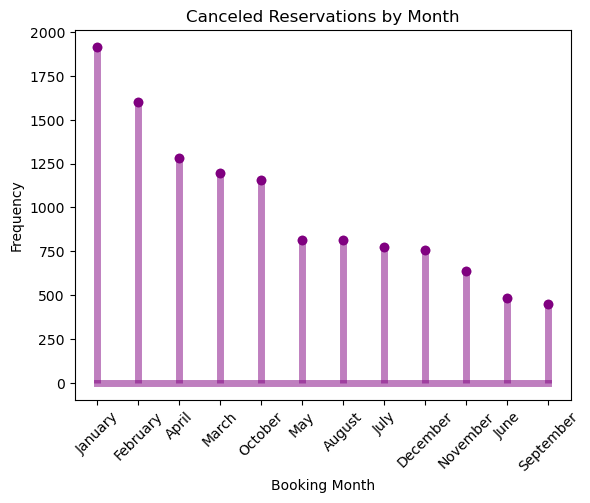

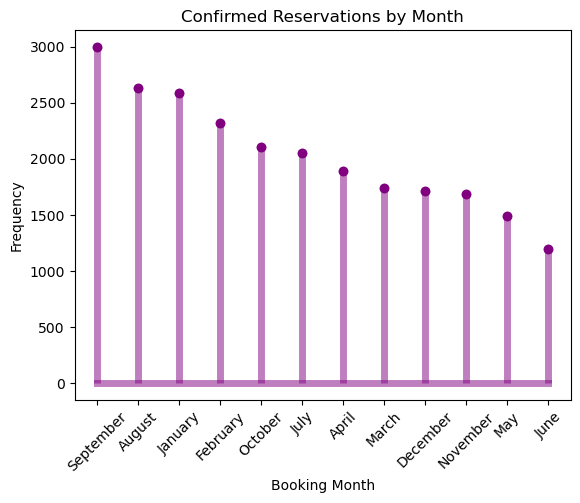

In [31]:

# Creating a lollipop chart for confirmed and canceled reservations by month
plot_lollipop(cncld_bkmon.index, cncld_bkmon, 
              "Booking Month", "Frequency", "Canceled Reservations by Month")


plot_lollipop(not_cncld_bkmon.index, not_cncld_bkmon, 
              "Booking Month", "Frequency", "Confirmed Reservations by Month")

Reservations made during the first 4 months of the year were the most canceled. `January` reservations had the most cancellations followed by `February`, `April` and `March`. 


##### I will now look at the lead time for these reservations.

In [32]:
# Canceled reservations by lead time
cncl_bkm_lt = canceled_df.groupby('booking_month')['lead_time'].sum().sort_values(ascending=False).to_frame()
cncl_bkm_lt

,lead_time
booking_month,
January,321059
October,263007
February,205302
March,146207
April,144526
December,136839
November,117523
August,85436
July,84740


In [33]:
# Confirmed reservations by lead time
not_cncld_bklt = not_canceled.groupby('booking_month')['lead_time'].sum().sort_values(ascending=False).to_frame()
not_cncld_bklt

,lead_time
booking_month,
January,217973
February,152455
April,148392
March,134924
July,128313
October,116349
August,110690
September,104399
December,103409


I will plot this on a lollipop chart as well.

In [34]:
def plot_function(ax,x,y,title):
    ax.plot(x,y)
    ax.set_title(title)

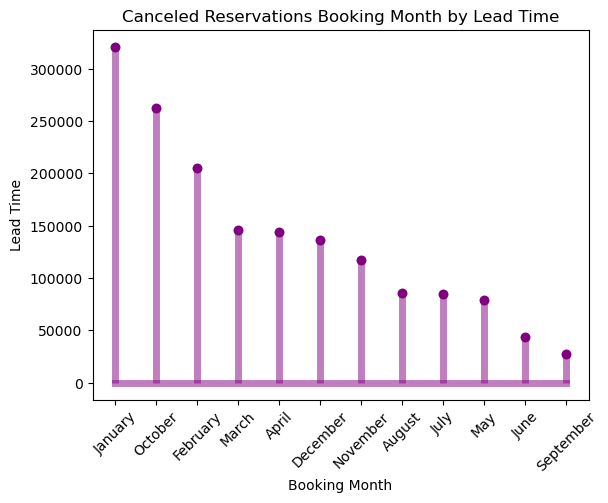

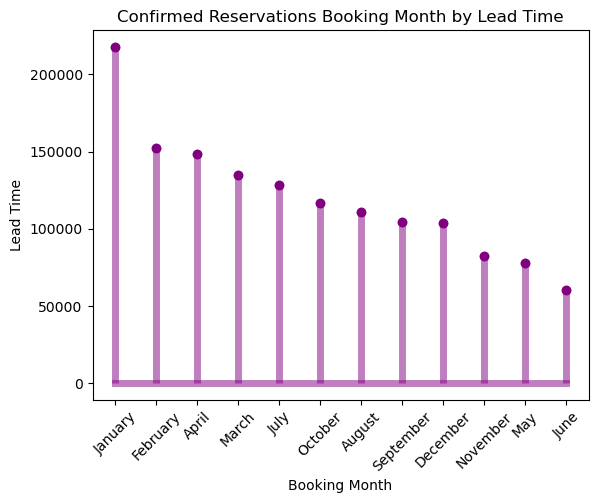

In [35]:
plot_function
plot_lollipop(cncl_bkm_lt.index, cncl_bkm_lt, "Booking Month", "Lead Time", 
              "Canceled Reservations Booking Month by Lead Time")
plot_lollipop(not_cncld_bklt.index, not_cncld_bklt, "Booking Month", "Lead Time", 
              "Confirmed Reservations Booking Month by Lead Time")

`January` is the month with the highest lead time for both confirmed and canceled reservations. `October` follows for canceled reservations then `February`, `March` and `April`. For confirmed reservations `February`, `April` and `March` follow after `January`, then `July` comes in. We see here that reservations with high lead times are made mostly during the first quarter of the year.

##### Now I want to check the average lead time for the confirmed and canceled reservations.

In [36]:
# Confirmed reservations average lead time 
not_cncld_avg_lt = not_canceled['lead_time'].mean()
print(' Average lead time for Confirmed reservations: {:.2f} days'.format(not_cncld_avg_lt))

 Average lead time for Confirmed reservations: 58.93 days


In [37]:
#Canceled reservations average lead time
cncld_avg_lt = canceled_df['lead_time'].mean()
print('Average lead time Canceled reservations: {:.2f} days'.format(cncld_avg_lt))

Average lead time Canceled reservations: 139.22 days


The average lead time for canceled reservations is `139 days`, which is more than double the average lead time of `59 days` for confirmed reservations.

##### Lets now look at canceled  and confirmed reservations by lead time category.

In [86]:
# Canceled reservations lead time category
cncld_lt_cat = canceled_df['leadtime_category'].value_counts()
cncld_lt_cat.to_frame()

,leadtime_category
More than 6 months,3899
31-60days,1480
91-120days,1401
151-180days,1316
1week-30days,1298
61-90days,1253
121-150days,773
1-6days,397
Same day,68


In [85]:
# Confirmed reservations lead time category
confirmed_lt_cat = not_canceled['leadtime_category'].value_counts()
confirmed_lt_cat.to_frame()

,leadtime_category
1week-30days,5741
31-60days,4827
1-6days,3678
61-90days,3255
91-120days,2097
121-150days,1497
More than 6 months,1378
Same day,1229
151-180days,688


Based on the two data sets provided, it can be observed that canceled reservations tended to be made further in advance compared to confirmed reservations. Specifically, the canceled reservations had a higher count of bookings in the booking window of `More than 6 months`, while the confirmed reservations had a higher count of bookings in the booking window of `Same-day` and `1-6 days`.
Additionally, cancelled bookings shows a lower count of reservations for `Same-day` and `1-6 days` booking windows, while the count of reservations for `91-120 days` and `151-180 days` booking windows increased in cancelled bookings compared to confirmed bookings.

I will now check the distribution of lead times for confirmed and cancelled bookings, allowing us to compare the two distributions and identify any differences between them.

In [40]:
# Function to create two histograms on the same plot
def two_hist(df1,df2,label1,label2,xlabel,ylabel,title):
    
    plt.hist(df1, bins=10, alpha=1, label=label1)
    plt.hist(df2, bins=10, alpha=0.7, label=label2)
    plt.xticks(rotation=70)
    # Add axis labels and a title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Add a legend and show the plot
    plt.legend()
    plt.show()



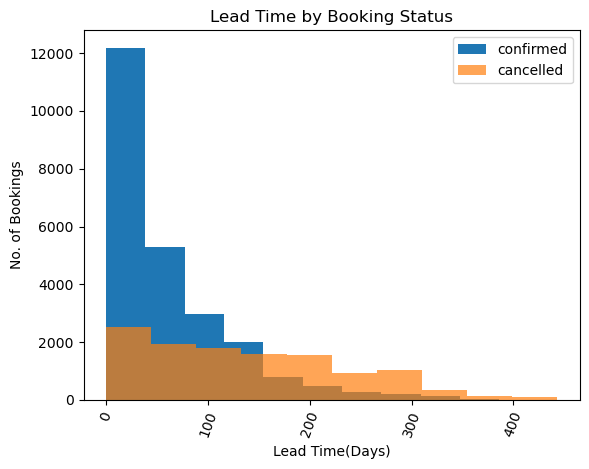

In [41]:
# Distribution of canceled and confirmed reservations by lead time 
cancelled = canceled_df['lead_time']
confirmed = not_canceled['lead_time']

two_hist(confirmed, cancelled,'confirmed','cancelled',
         'Lead Time(Days)','No. of Bookings','Lead Time by Booking Status')

The resulting chart shows that the distribution of lead times for confirmed bookings are significantly lower as compared to that of cancelled bookings.

##### Next I will find out which reserved room type got the most cancellations.

In [42]:
# Top 5 canceled reservations by room types
top5_crt = canceled_df['room_type_reserved'].value_counts().head()
top5_crt.to_frame()

,room_type_reserved
Room_Type 1,9072
Room_Type 4,2069
Room_Type 6,406
Room_Type 2,228
Room_Type 5,72


In [126]:
# Top 5 not canceled reservations by room types
top5_ncrt = not_canceled['room_type_reserved'].value_counts().head()
top5_ncrt.to_frame()

,room_type_reserved
Room_Type 1,19058
Room_Type 4,3988
Room_Type 6,560
Room_Type 2,464
Room_Type 5,193


`Room type 1` has the most reservations hence the most cancellations with `9072` cancellations. `Room type 4`, `Room type 6`, `Room type 2` and `Room type 5` follow with `2069`, `406`, `228` and `72` cancelled reservations respectively. 

I will plot the top 5 canceled reservations by room type on a bar chart.

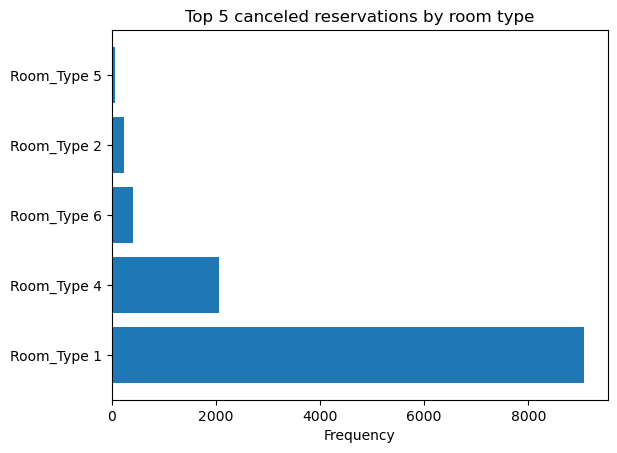

In [127]:
# Top 5 canceled reservations by room type
plt.barh(top5_crt.index, top5_crt)
plt.title('Top 5 canceled reservations by room type')
plt.xlabel('Frequency');

##### Now I want to check the reservations by number of days category for canceled and confirmed reservations

In [46]:
# Canceled reservations by No. of Days category
canceled_df['length_of_stay'].value_counts().to_frame()

,length_of_stay
3-6days,6815
1-2days,4365
1-2weeks,645
2-3weeks,54
More than 3weeks,4
Same day,2


In [47]:
# Confirmed reservations by No. of Days category
not_canceled['length_of_stay'].value_counts().to_frame()

,length_of_stay
3-6days,12750
1-2days,10711
1-2weeks,840
Same day,76
2-3weeks,12
More than 3weeks,1


Reservations for `3-6 days`, `1-2days` and `1-2weeks` had the most reservations, in that order, for both canceled and confirmed reservations. `Same day` reservations, though hardly booked are also hardly canceled with `2` reservations canceled out of `78` reservations. On the other hand, reservations made for `2-3weeks` are canceled more often than not with `54` reservations being canceled out of `66` reservations made.

##### I will now plot the distribution of number of days reserved for canceled and confirmed bookings

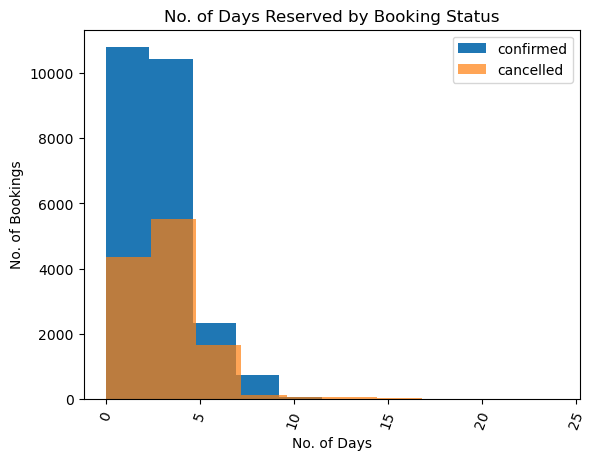

In [48]:
# Distribution of canceled and confirmed reservations by no. of days
cancelled = canceled_df['no_of_days']
confirmed = not_canceled['no_of_days']

two_hist(confirmed, cancelled,'confirmed','cancelled',
         'No. of Days','No. of Bookings','No. of Days Reserved by Booking Status')

##### Next I will check number of bookings by the market segment type for canceled and confirmed reservations

In [117]:
# Canceled reservations by market segment
mkt_seg_cncld = canceled_df['market_segment_type'].value_counts().to_frame()
mkt_seg_cncld

,market_segment_type
Online,8475
Offline,3153
Corporate,220
Aviation,37
Complementary,0


In [116]:
# Confirmed reservations by market segment
not_cncld_mkt = not_canceled['market_segment_type'].value_counts().to_frame()
not_cncld_mkt

,market_segment_type
Online,14739
Offline,7375
Corporate,1797
Complementary,391
Aviation,88


The `Online` market segment have the most reservations both canceled and confirmed, followed by the `Offline` and `Corporate` segments. For the `Aviation` segment out of `125` reservations booked `37` were canceled and for the `Complementary` segments there are no cancellations at all out of `391` reservations.    

##### Now I will find out how many of the reservations made, both canceled and confirmed, are from repeated guests.

In [51]:
# Repeated guests by booking status
rep_guest = df_clean.groupby('booking_status')['repeated_guest'].sum().to_frame()
rep_guest

,repeated_guest
booking_status,
Canceled,16
Not_Canceled,914


I will plot this on a pie chart.

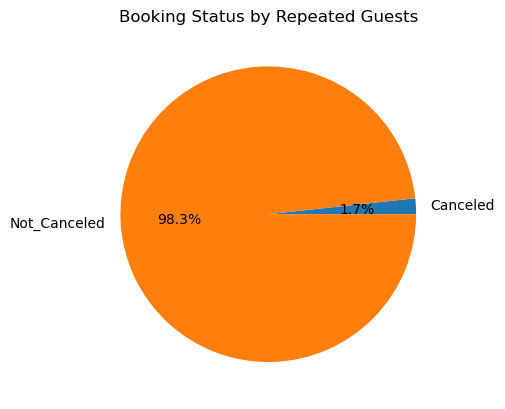

In [52]:
# Pie chart for booking status by repeated guests
fig, ax = plt.subplots()
ax.pie(rep_guest['repeated_guest'], labels=rep_guest.index, autopct='%1.1f%%')
# Set title
ax.set_title('Booking Status by Repeated Guests')
# Show plot
plt.show()

Out of the total reservations made by repeated guests, `1.7%` were cancellations and `98.3%` were confirmed bookings.

##### I will now look at the number of previous cancellations and comfirmations by booking status

In [53]:
# Number of previous cancellations by booking status
num_prev_cncl = df_clean.groupby('booking_status')['no_of_previous_cancellations'].sum().to_frame()
num_prev_cncl

,no_of_previous_cancellations
booking_status,
Canceled,66
Not_Canceled,781


In [65]:
# Number of previous bookings confirmed by booking status
num_prev_cnfrm = df_clean.groupby('booking_status')['no_of_previous_bookings_not_canceled'].sum().to_frame()
num_prev_cnfrm

,no_of_previous_bookings_not_canceled
booking_status,
Canceled,26
Not_Canceled,5539


I will now plot this on a pie chart

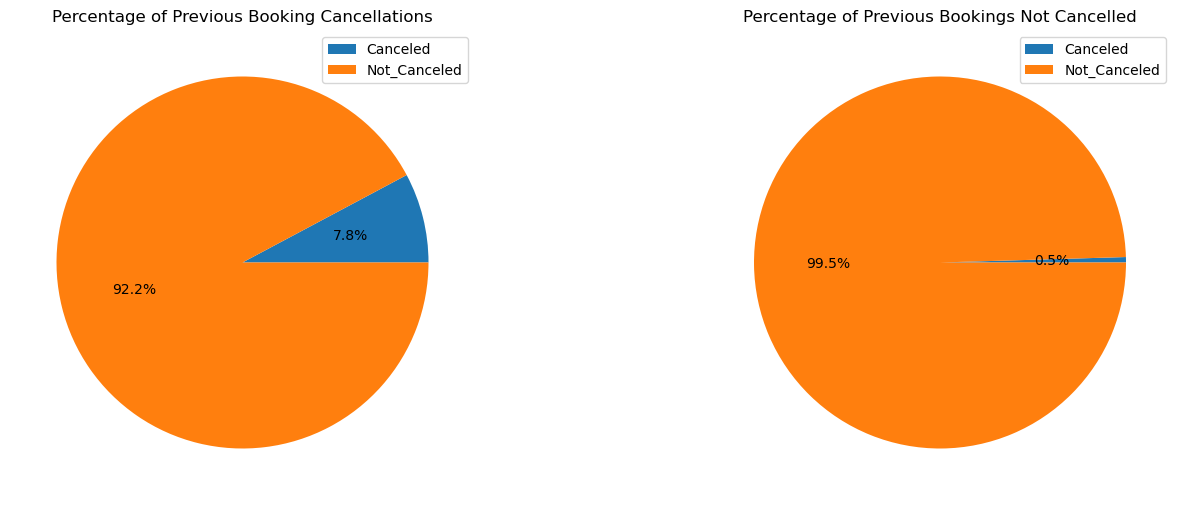

In [84]:
# Creating a pie chart
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.pie(num_prev_cncl['no_of_previous_cancellations'],
        autopct='%.1f%%')
plt.title("Percentage of Previous Booking Cancellations")
plt.legend(num_prev_cncl.index)

plt.subplot(1,2,2)
plt.pie(num_prev_cnfrm['no_of_previous_bookings_not_canceled'],
        autopct='%.1f%%')
plt.title("Percentage of Previous Bookings Not Cancelled")
plt.legend(num_prev_cnfrm.index)
plt.subplots_adjust(wspace=0.5)

plt.show()

The chart indicates that the cancellation rate for previous bookings that were cancelled is much higher `(7.8%)` than that for previous bookings that were not cancelled `(0.5%)`. This is the case even though the number of reservations for the latter is significantly higher than that for the former.

##### Now I wil check the average price per room and it's correlation with canceled reservations

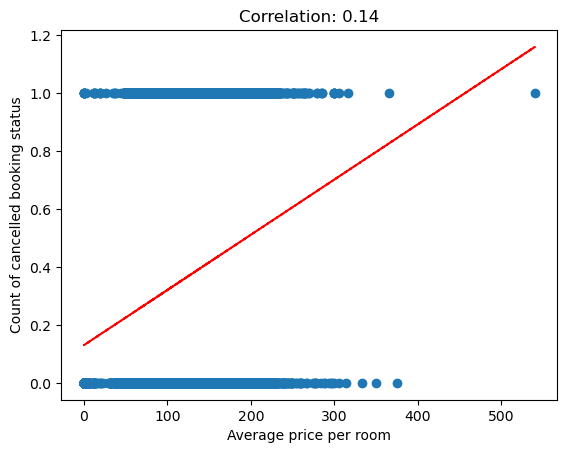

In [115]:
# Calculate the correlation coefficient
corr_coef = df_clean['avg_price_per_room'].corr(df_clean['booking_status']=='Canceled')

# Plot the data points and add a trendline
plt.scatter(df_clean['avg_price_per_room'], df_clean['booking_status']=='Canceled')
z = np.polyfit(df_clean['avg_price_per_room'], df_clean['booking_status']=='Canceled', 1)
p = np.poly1d(z)
plt.plot(df_clean['avg_price_per_room'], p(df_clean['avg_price_per_room']), "r--")

# Add labels and title
plt.xlabel("Average price per room")
plt.ylabel("Count of cancelled booking status")
plt.title("Correlation: {:.2f}".format(corr_coef))

# Show the plot
plt.show()

We see here that there is a weak positive correlation of `0.14` between average room price and cancelled bookings. This means that as the average room price increases, there is a slight tendency for the number of canceled reservations to also increase, but the relationship is not very strong.

 ## Recommendations
 1. Implement a waitlist system for reservations with lead times of `139 days` and above since that's the average lead time for canceled reservations, to fill cancellations quickly and efficiently, minimizing the impact on our occupancy and revenue.
 2. Implement to incentivize guests to rebook their reservations instead of cancelling, such as offering a credit or special promotion for a future stay.
 3. Consider adjusting the pricing strategy to offer more value to guests booking higher-priced rooms or introducing promotions to incentivize bookings for higher-priced rooms during slower periods. 
 4. Use customer feedback and reviews to improve our overall guest experience and reduce the likelihood of cancellations.
 5. Consider offering personalized incentives or rewards for repeated guests to increase loyalty and reduce cancellations.
 6. Consider adjusting marketing or pricing strategies to target certain market segments with lower cancellation rates or to incentivize higher booking rates for market segments with higher cancellation rates.
 7. Consider offering discounts or promotions for longer stays, or adjusting pricing strategies to incentivize longer stays during slower periods.